In [1]:
#필요 라이브러리 설치

In [4]:
pip install scikit-learn 


  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------------

In [5]:
pip install ultralytics

  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.2-cp39-cp39-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.6.15-py3-none-any.whl.metadata (2.4 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 25.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------- ----------------------------- 10.7/39.5 MB 51.7 MB/s eta 0:00:01
   ----------------------- ---------------- 23.3/39.5 MB 56.8 MB/s eta 0:00:01
   ------------------------------------ --- 35.7/39.5 MB 58.1 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 50.2 MB/s eta 0:00:00
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached ch

In [1]:
#모델 학습 시키기
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\choyk\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [1]:
import torch
print(torch.cuda.is_available(), torch.cuda.device_count())


True 1


In [ ]:
#pip uninstall -y torch torchvision torchaudio


Found existing installation: torch 2.7.1
Uninstalling torch-2.7.1:
  Successfully uninstalled torch-2.7.1
Found existing installation: torchvision 0.22.1
Uninstalling torchvision-0.22.1:
  Successfully uninstalled torchvision-0.22.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
   ---------------------------------------- 0.0/2.8 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 GB 56.1 MB/s eta 0:00:51
   ---------------------------------------- 0.0/2.8 GB 59.4 MB/s eta 0:00:48
    --------------------------------------- 0.0/2.8 GB 61.0 MB/s eta 0:00:46
    --------------------------------------- 0.0/2.8 GB 60.5 MB/s eta 0:00:46
    --------------------------------------- 0.1/2.8 GB 60.7 MB/s eta 0:00:46
   - -------------------------------------- 0.1/2.8 GB 61.0 MB/s eta 0:00:45
   - -------------------------------------- 0.1/2.8 GB 60.9 MB/s eta 0:00:45
   - -------------------------------------- 0.1/2.8 GB 60.9 MB/s eta 0:00:45
   - -------------------------------------- 0.1/2.8 GB 61.2 MB/s eta 0:00:45
   - -------------------------------------- 0.1/2.8 GB 61.6 MB/s eta 0:00:44
   - -------------------------------------- 0.1/2.8 GB 61.2 MB/s eta 0:00:44
   -- -------------------

In [ ]:
#pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json                                 # JSON 형식으로 데이터를 직렬화하기 위해 사용
import base64                               # 이미지 인코딩 및 디코딩
import requests                             # AI 사용
import os                                   # API 키 저장
import mimetypes                            # 이미지 파일 형식 통합
import tempfile                             # 임시 파일 생성(임시 이미지 파일 경로)
from dotenv import load_dotenv              # 키 불러오기
from ultralytics import YOLO                # YOLOv8 모델을 불러오기 위한 라이브러리
from typing import List, Dict, Union        # 타입 힌트를 위한 모듈
from openai import OpenAI                   # OpenAI 사용
from PIL import Image                       # Base64 --> PIL
from io import BytesIO



class IngredientDetector:
    ''' 
    생성자
    model_path: str = 모델 파일 경로, 문자열 타입 명시
    '''
    def __init__(self, model_path: str):
        # 예외처리
        try:    
            self.model = YOLO(model_path) # YOLO 모델을 로드
            self.class_names = self.model.names  # 클래스 ID와 이름 매핑 딕셔너리 (예: {0: 'egg', 1: 'tomato'})
        except FileNotFoundError as e:
            print('모델 파일을 찾을 수 없습니다. 모델의 경로를 다시 확인해주세요.')
        # OpenAI 클라이언트 준비
        load_dotenv()
        OPEN_API_KEY = os.getenv('OPEN_API_KEY')
        self.openai_client = OpenAI(api_key=OPEN_API_KEY)

    # 식재료 분류 메서드
    def classify_ingredients(self, image_dicts: List[dict]) -> List[Dict[str, int]]:
        """
        image_path: base64로 변환된 이미지를 받음
        이미지에 포함된 식재료 리스트 반환
        """
        
        # 모든 이미지의 감지 결과를 저장할 리스트
        all_labels = []
        # 이미지를 전달하기 위한 검사
        for i, image_dict in enumerate(image_dicts):
            try:
                img = self.dict_to_pil_image(image_dict)
                if img is None:
                    all_labels.append([])
                    continue
                # PIL --> 임시 파일 경로
                temp_path = self.pil_to_temp_path(img)

                # YOLO 모델 추론
                result = self.model(temp_path)[0]  # YOLO 감지 결과
                labels = [] # 현재 이미지의 식재료를 저장하는 리스트
                confidence_threshold = 0.8  # 이 값 이하이면 신뢰도가 낮다고 판단
                low_confidence_detected = False

                # YOLO가 탐지에 실패했을 시에 AI 사용
                if result.boxes is None or len(result.boxes) == 0:
                    #print(f'{i}번째 이미지에서는 객체를 감지하지 못했습니다. AI를 사용합니다.')
                    fallback_labels = self.detect_with_ai(temp_path)

                    # 중복 처리, all_labels와 비교 후 새로운 값만 추가
                    flattened=[]
                    for item in fallback_labels:
                        if isinstance(item, list):
                            flattened.extend(item)
                        else:
                            flattened.append(item)
                    # all_labels에 존재하는 전체 라벨 flatten
                    existing_labels = set(label for sublist in all_labels for label in sublist) # all_labels의 리스트 요소의 요소들을 추가
                    # 중복 제거 및 새 항목 추가
                    new_labels = [label for label in set(flattened) if label not in existing_labels]
                    all_labels.append(new_labels if new_labels else []) # new_labels가 비어 있지 않으면 추가, 비어있으면 [] 추가
                    continue  # 다음 이미지로 이동
                
                # YOLO의 신뢰도가 낮으면 AI 사용
                for box in result.boxes:    # 감지된 객체들 반복
                    conf = float(box.conf)
                    if conf >= confidence_threshold:
                        cls_id = int(box.cls)   # 클래스ID를 정수로 변환(0.0 --> 0 등)
                        label = self.class_names[cls_id]    # 클래스 ID를 이름으로 변환(1 --> 사과 등)
                        labels.append(label)    # 이름을 리스트에 추가
                    else:
                        low_confidence_detected = True # 신뢰도 낮은 객체 있음
                # label이 있을 시
                if labels:
                    all_labels.append(list(set(labels)))    # 현재 이미지 결과를 전체 리스트에 추가(중복 제거)
                # 신뢰도가 낮거나 객체 미탐지 시
                elif low_confidence_detected or result.boxes: 
                    fallback_labels = self.detect_with_ai(temp_path)
                    # 위와 같은 방식으로 중복 제거
                    flattened = []
                    for item in fallback_labels:
                        if isinstance(item, list):
                            flattened.extend(item)  # 리스트 안의 요소들을 꺼내서 추가
                        else:
                            flattened.append(item)  # 문자열이면 그대로 추가
                    existing_labels = set(label for sublist in all_labels for label in sublist)
                    new_labels = [label for label in set(flattened) if label not in existing_labels]
                    all_labels.append(new_labels if new_labels else []) # new_labels가 비어 있지 않으면 추가, 비어있으면 [] 추가

                    # 안전장치 YOLO, GPT 둘 다 아무런 결과를 내지 못했을 때 공리스트 반환
                else:  
                    all_labels.append([])
                
            except Exception as e:
                print(f'!!!에러 발생!!! {i}번째 이미지를 처리 중 오류가 발생했습니다. 오류: {e}')
                all_labels.append([])   # 오류가 난 경우 빈 리스트를 추가 후 계속 진행
            #임시 파일 경로 삭제
            finally:
                try:
                    os.remove(temp_path)
                except Exception as e:
                    print(f'에러 발생!! 임시 파일 삭제 실패: {e}')
        return all_labels
    
    # AI를 활용한 보조 탐지 메서드
    def detect_with_ai(self, image_path: str) -> List[str]:   # 이미지 경로를 리스트 형식으로 반환
        try:
            # 이미지 형식 확인
            mime_type, _ = mimetypes.guess_type(image_path)
            if mime_type is None:
                mime_type = 'image/jpeg'    # 기본값 설정

            # 이미지를 base64로 인코딩
            with open(image_path, 'rb') as img_file:
                ''' 
                이미지를 바이너리 읽기 모드로 연 후 인코딩. --> GPT가 읽을 수 있는 형태로 변환하기 위해 
                utf-8로 디코딩하여 바이트 --> 문자열로 변환 
                '''
                img_base64 = base64.b64encode(img_file.read()).decode('utf-8')
                

                # response 객체 생성
                response = self.openai_client.responses.create(
                    model='gpt-4.1',
                    input=[{
                        # 역할
                        "role": "developer",
                        "content": "식재료에 대해 잘 알고 있어."
                    },
                    {
                        # 질문
                        "role": "user",
                        "content": [
                            # 이미지는 실제 URL 없이 이미지 전달
                            {"type": "input_text", "text": "이 이미지에는 어떤 식재료들이 보이나요? 식재료의 이름들만 쉼표로 구분해서 알려주세요."},
                            {
                                "type": "input_image", 
                                "image_url":  f"data:{mime_type};base64,{img_base64}"
                            }
                        ]
                    }],
                    max_output_tokens=200   # 간단한 응답만 필요
                )
                # 결과 반환
                answer = response.output_text
                # 응답 결과 간단하게 파싱: 쉼표 기준 분리
                return [x.strip() for x in answer.split(',')]

        except Exception as e:
            print(f'GPT 문제 발생: {e}')
            return []
        
    # base64 --> PIL 변경
    def dict_to_pil_image(self, image_dict:dict) -> Image.Image:
        try:
            b64_data = image_dict.get("data")
            if not b64_data:    # 데이터 필드가 비었을 시 에러
                raise ValueError("data 필드가 비어 있습니다.")
            
            # data:image/png;base64,... 형태일 경우 MIME 프리픽스 제거
            if b64_data.startswith("data:image"):
                b64_data = b64_data.split(",")[1]
            img_data = base64.b64decode(b64_data)
            image = Image.open(BytesIO(img_data))
            image.load()    # 오류 방지. 명시적 이미지 로딩
            return image
        except Exception as e:
            print(f'[dict_to_pil_image] base64 디코딩 또는 이미지 로딩 오류: {e}')
            return None

    # 임시 경로 생성 메서드: dict 형대로 YOLO에 넣을 수 없기 때문에 
    def pil_to_temp_path(self, pil_img) -> str:
        format = pil_img.format if pil_img.format else "PNG"    # 기본 값

        extension = f".{format.lower()}"

        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=extension)
        pil_img.save(temp_file.name, format=format)
        return temp_file.name

    #JSON 변환 메서드
    def to_json(self, image_dick: List[dict]) -> str: 
        """
        이미지는 단일 객체, 리스트, 딕셔너리 형태로 반환
        classify_ingredients 결과를 JSON 형식으로 반환
        반환값: JSON 문자열
        """
        try:
            all_labels = self.classify_ingredients(image_dick) # 감지 결과 가져오기 
            return json.dumps({"results": all_labels}, ensure_ascii=False, indent=2)    # 한글이 안깨지게 설정. 들여쓰기까지(가독성)
        
        except Exception as e:
            print(f'to_json 오류 발생: {e}')
            return json.dumps({"error": str(e)}, ensure_ascii=False, indent=2)
        
        
#main파일
def pil_image_to_dict(img):
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode()
    return {
        "mode": img.mode,
        "size": img.size,
        "data": img_str
    }

def main():
    yolo_model_path = "C:/Users/choyk/Documents/GitHub/SK_module_project_1/src/back2/runs/food_ingredient_fresh/weights/best.pt"   #실제로는 환경변수 사용(env파일 등)
    img = Image.open("cc.jpg")
    img_dict = pil_image_to_dict(img)
    detector = IngredientDetector(yolo_model_path)
    #detector.to_json(test_image_path)
    print(detector.to_json([img_dict]))



if __name__=="__main__":
    main()


!!!에러 발생!!! 0번째 이미지를 처리 중 오류가 발생했습니다. 오류: Unsupported image type. For supported types see https://docs.ultralytics.com/modes/predict
{
  "results": [
    []
  ]
}


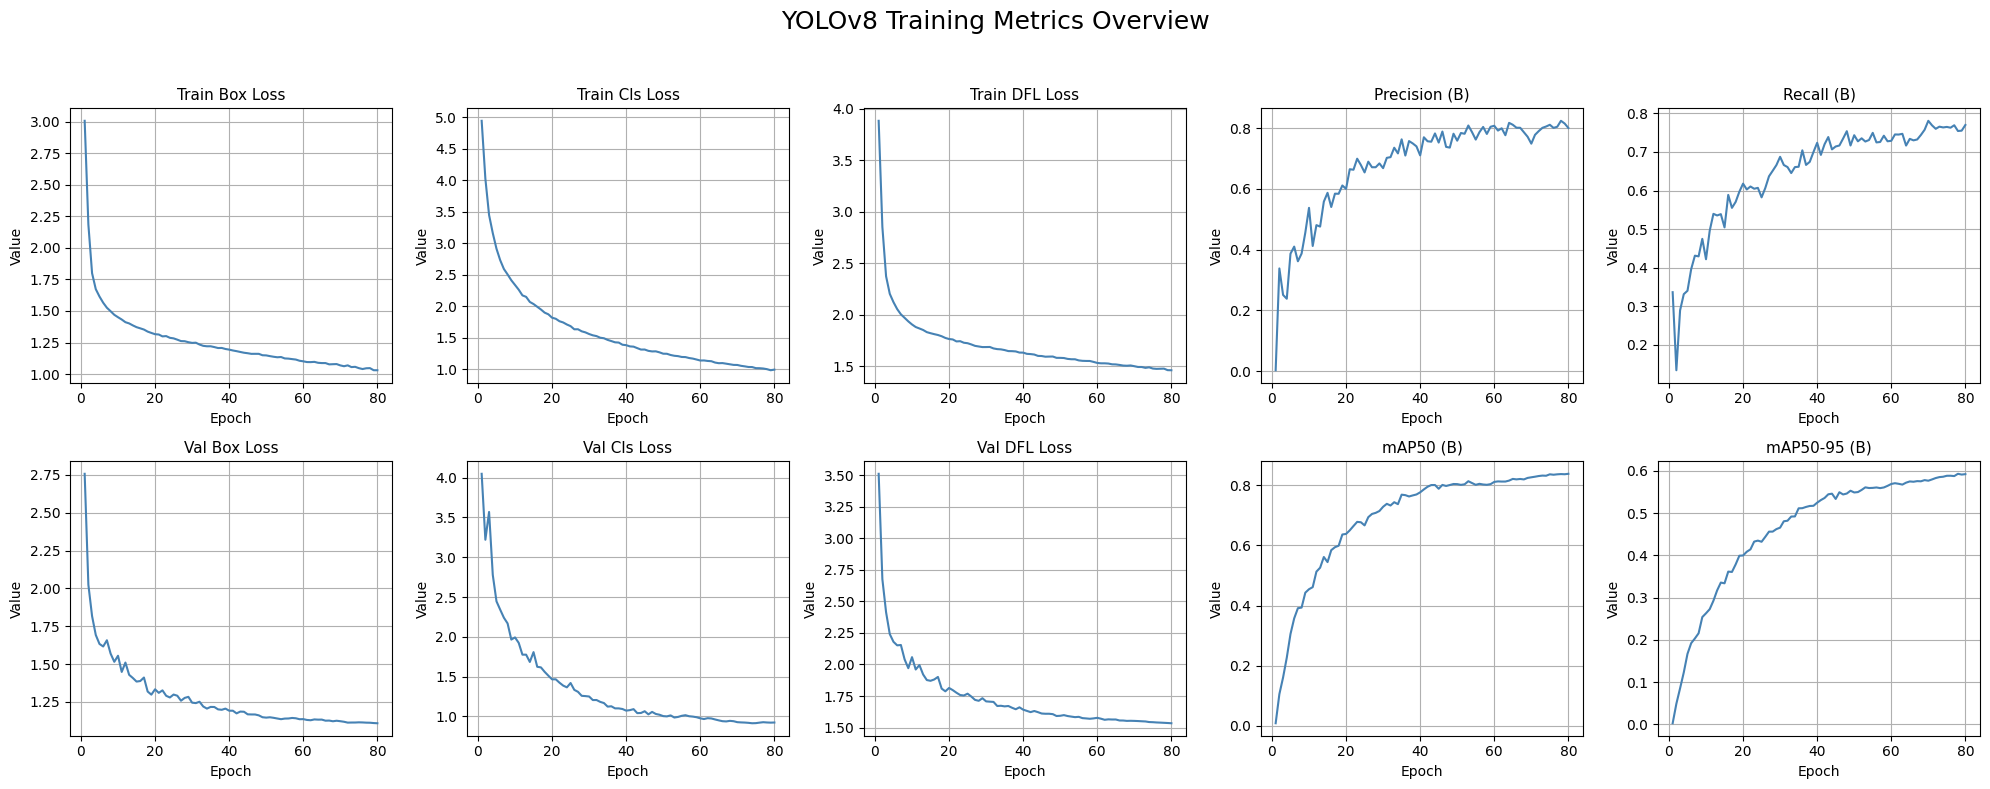

In [ ]:
#학습 결과 그래프 생성
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기
df = pd.read_csv('runs/food_ingredient_fresh/results.csv')  # YOLO 결과 CSV 경로

# 사용할 열과 제목 정의
metrics = [
    ('train/box_loss', 'Train Box Loss'),
    ('train/cls_loss', 'Train Cls Loss'),
    ('train/dfl_loss', 'Train DFL Loss'),
    ('metrics/precision(B)', 'Precision (B)'),
    ('metrics/recall(B)', 'Recall (B)'),
    ('val/box_loss', 'Val Box Loss'),
    ('val/cls_loss', 'Val Cls Loss'),
    ('val/dfl_loss', 'Val DFL Loss'),
    ('metrics/mAP50(B)', 'mAP50 (B)'),
    ('metrics/mAP50-95(B)', 'mAP50-95 (B)')
]

# 그래프 설정
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
fig.suptitle('YOLOv8 Training Metrics Overview', fontsize=18)

for i, (key, title) in enumerate(metrics):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    
    if key in df.columns:
        ax.plot(df['epoch'], df[key], color='steelblue')
        ax.set_title(title, fontsize=11)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Value')
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, f"'{key}'\n없음", ha='center', va='center', fontsize=10)
        ax.set_axis_off()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 확보
plt.savefig('result.png')  # 저장
plt.show()



In [ ]:
#토마토 번호 추출
import yaml

with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)

index = data["names"].index("Tomato")
print(index)  # 결과: 108


108


In [ ]:
#햄 번호 추출 = 57
import yaml

with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)

index = data["names"].index("Ham")
print(index)

57


In [24]:
#사과 번호 추출 = 57
import yaml

with open("data.yaml", "r", encoding="utf-8") as f:
    data = yaml.safe_load(f)

index = data["names"].index("사과")
print(index)

1


In [26]:
#바나나 번호 추출
import yaml

with open("data.yaml", "r", encoding="utf-8") as f:
    data = yaml.safe_load(f)

index = data["names"].index("바나나")
print(index)

8


In [30]:
#라벨 파일의 클래스 번호 변환
import os

label_dir = "C:/Users/choyk/Desktop/Banana.v1i.yolov8/train/labels"  # 라벨 파일이 저장된 폴더 경로

for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        path = os.path.join(label_dir, filename)
        
        with open(path, "r", encoding="utf-8") as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            parts = line.strip().split()
            if parts and parts[0] == "0":
                parts[0] = "8"
            new_lines.append(" ".join(parts))

        with open(path, "w", encoding="utf-8") as f:
            f.write("\n".join(new_lines))

### 모델 개선 방향
- 클래스 개수를 줄이고 분류 성능을 높이는 방향
    - 클래스를 미리 지정 후 알맞는 데이터셋을 찾아 라벨링하는 작업
    - 클래스: ['밥', '배추', '숙주나물', '소고기', '빵', '양배추', '당근', '닭고기', '오이', '조림용 고등어', '두부', '가지', '달걀', '어묵', '마늘', '마늘 정향', '생강', '김치', '대파', '고등어', '양파', '파프리카', '칵테일 새우', '들꺠', '돼지고기', '감자', '무', '새우', '호박', '오징어', '고구마'] 로 설정
    - nc = 31

In [4]:
import json # JSON 형식으로 데이터를 직렬화하기 위해 사용
from ultralytics import YOLO # YOLOv8 모델을 불러오기 위한 라이브러리
from typing import List, Dict, Union # 타입 힌트를 위한 모듈

class IngredientDetector:
    ''' 
    생성자
    model_path: str = 모델 파일 경로, 문자열 타입 명시
    '''
    def __init__(self, model_path: str):
        #예외처리
        try:    
            self.model = YOLO(model_path) # YOLO 모델을 로드
            self.class_names = self.model.names  # 클래스 ID와 이름 매핑 딕셔너리 (예: {0: 'egg', 1: 'tomato'})
        except FileNotFoundError as e:
            print('파일을 찾을 수 없습니다. 모델의 경로를 다시 확인해주세요.')

    # 식재료 분류 메서드
    def classify_ingredients(self, image_paths: Union[str, List[str]]) -> List[Dict[str, int]]:
        """
        image_path: 하나 이상의 이미지 경로를 받음
        union[str, List[str]]: 문자열 하나 또는 문자열 리스트를 허용. 반환 타입 -> str
        반환값: [{'tomato': 2, 'egg': 1}, {'onion': 3}, ...] 등 각 이미지마다 감지된 식재료 이름과 개수를 담은 딕셔너리 리스트

        """
        if isinstance(image_paths, str):
            # 단일 문자열이면 리스트로 변환하여 일관된 처리
            image_paths = [image_paths]
        # 모든 이미지의 감지 결과를 저장할 리스트
        all_labels = []

        # 각 이미지에 대한 결과 반복
        for i, result in enumerate(self.model(image_paths)):    #오류 이미지의 순서를 알기 위해 추가
            try:
                labels = [] # 현재 이미지의 식재료를 저장하는 리스트
                for box in result.boxes:    # 감지된 객체들 반복
                    cls_id = int(box.cls)   # 클래스ID를 정수로 변환(0.0 --> 0 등)
                    label = self.class_names[cls_id]    # 클래스 ID를 이름으로 변환(1 --> 사과 등)
                    labels.append(label)    #이름을 리스트에 추가
                all_labels.append(list(set(labels)))   # 현재 이미지 결과를 전체 리스트에 추가(중복 제거)
            except Exception as e:
                print(f'!!!에러 발생!!! {i}번째 이미지를 처리 중 오류가 발생했습니다. 오류: {e}')
                all_labels.append([])   #오류가 난 경우 빈 리스트를 추가 후 계속 진행
        return all_labels
    #JSON 변환 메서드
    def to_json(self, image_paths: Union[str, List[str]]) -> str: 
        """
        classify_ingredients 결과를 JSON 형식으로 반환
        반환값: JSON 문자열
        """
        try:
            all_labels = self.classify_ingredients(image_paths) # 감지 결과 가져오기 
            return json.dumps({"results": all_labels}, ensure_ascii=False, indent=2)    # 한글은 없지만 한글이 안깨지게 설정. 들여쓰기까지(가독성)
        
        except Exception as e:
            print(f'to_json 오류 발생: {e}')
            return json.dumps({"error": str(e)}, ensure_ascii=False, indent=2)

#main파일

def main():
    yolo_model_path = "C:/Users/choyk/Documents/GitHub/SK_module_project_1/src/back2/runs/food_ingredient_fresh/weights/best.pt"   #실제로는 환경변수 사용(env파일)
    test_image_path = ["-64_jpg.rf.257e4ea427385ddff81fd281945dbb0e.jpg"]
    detector = IngredientDetector(yolo_model_path)

    print(detector.to_json(test_image_path))



if __name__=="__main__":
    main()



0: 640x640 1 , 9.2ms
Speed: 2.4ms preprocess, 9.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
{
  "results": [
    [
      "숙주나물"
    ]
  ]
}
